In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/GOUSE BASHA/Downloads/data.csv", encoding= 'unicode_escape')
print(df.head())

                           video_id trending_date  \
0                       kzwfHumJyYc      17.14.11   
1                       zUZ1z7FwLc8      17.14.11   
2                       10L1hZ9qa58      17.14.11   
3                       N1vE8iiEg64      17.14.11   
4  Subscribe to our YouTube Channel           NaN   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4                                                NaN              NaN   

  category_id              publish_time  \
0           1  2017-11-12T12:20:39.000Z   
1          25  2017-11-13T05:43:56.000Z   
2          24  2017-11-12T15:48:08.000Z   
3          23  2017-11-12T07:08:48.000Z   
4         NaN              

C:\Users\GOUSE BASHA\AppData\Local\Temp\ipykernel_8956\1413906225.py:4: DtypeWarning: Columns (4,9,10,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/GOUSE BASHA/Downloads/data.csv", encoding= 'unicode_escape')


In [41]:
# Generate summary statistics
summary_stats = df.describe()
print(summary_stats)


              views         likes
count  3.735200e+04  3.735200e+04
mean   1.060473e+06  2.708270e+04
std    3.184933e+06  9.714510e+04
min    1.400000e+01  0.000000e+00
25%    1.239155e+05  8.640000e+02
50%    3.045860e+05  3.069000e+03
75%    7.992912e+05  1.377425e+04
max    1.254322e+08  2.912710e+06


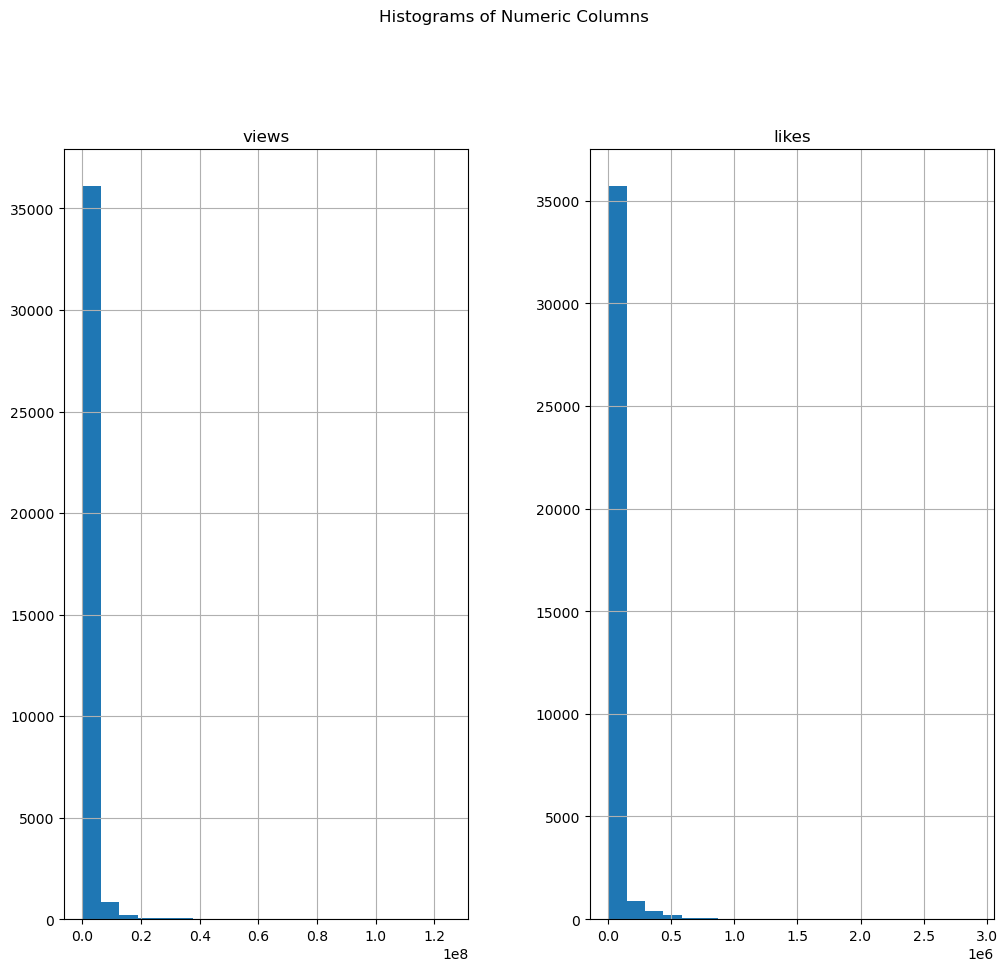

In [42]:
# Create histograms for numeric columns
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numeric Columns', y=1.02)
plt.show()


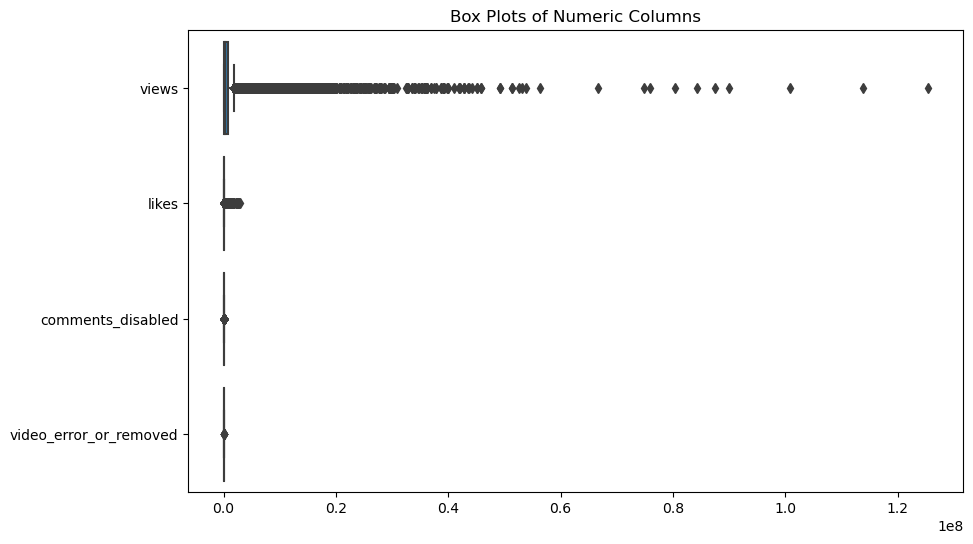

In [43]:
# Create box plots for numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Numeric Columns')
plt.show()


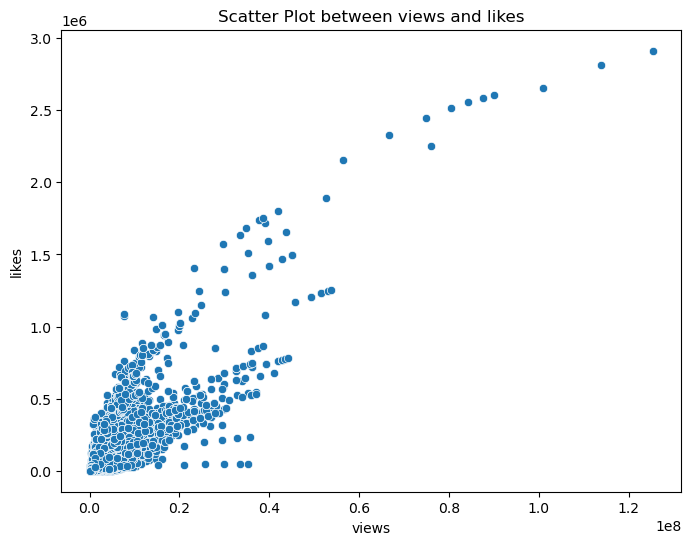

In [44]:
# Create a scatter plot for two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Scatter Plot between views and likes')
plt.show()


In [45]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


In [46]:

df = df[df['likes'].apply(lambda x: str(x).isnumeric())]


C:\Users\GOUSE BASHA\anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\GOUSE BASHA\anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


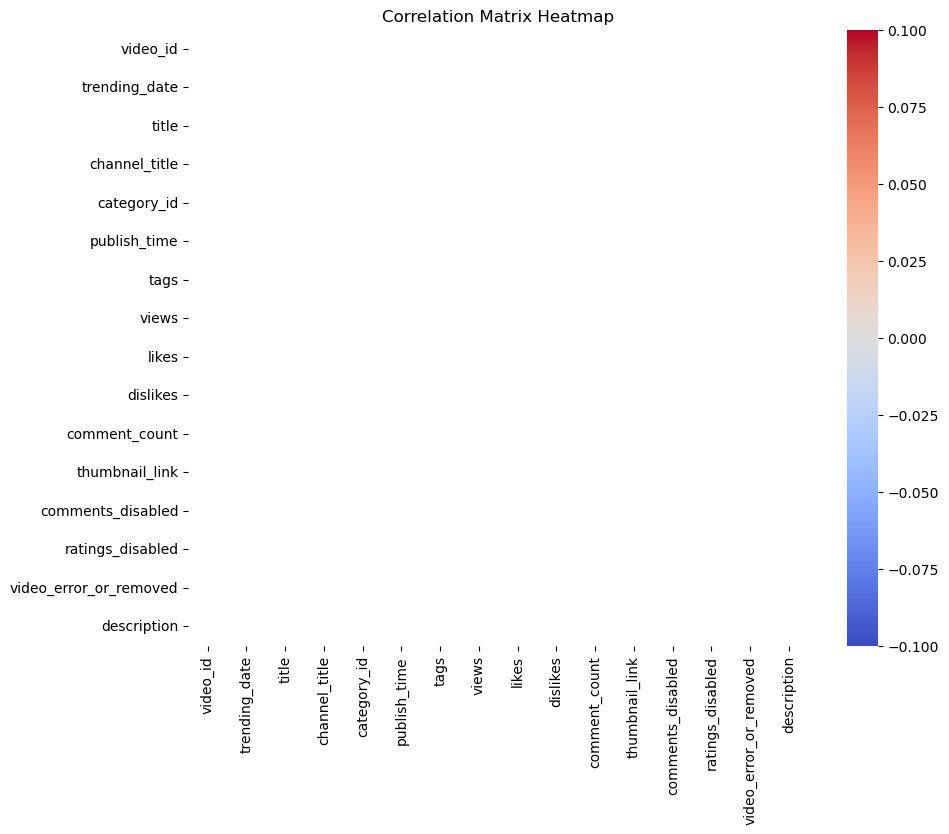

In [47]:
correlation_matrix = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


C:\Users\GOUSE BASHA\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


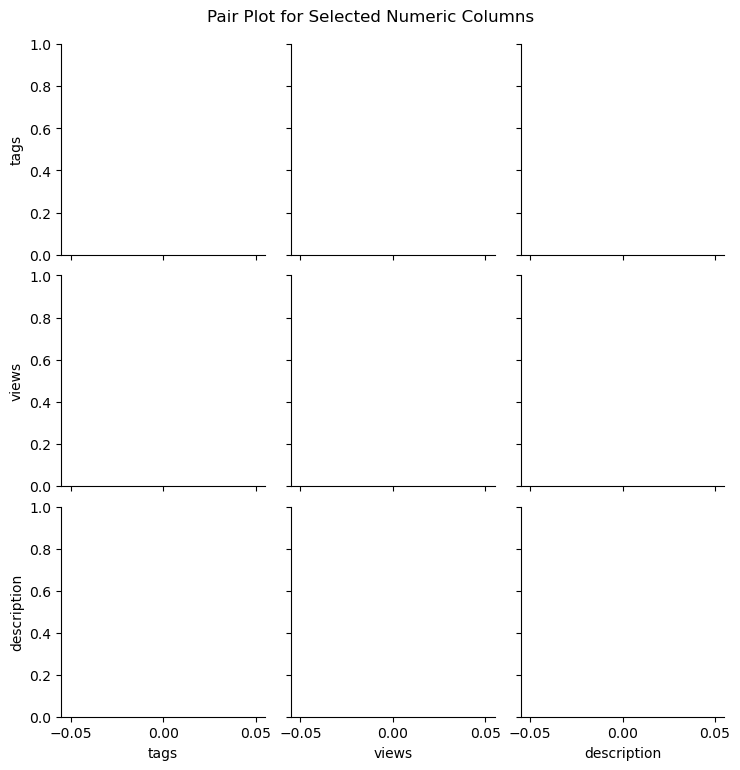

In [48]:
# Create a pair plot for selected numeric columns
sns.pairplot(df[['tags', 'views', 'description']])
plt.suptitle('Pair Plot for Selected Numeric Columns', y=1.02)
plt.show()


In [49]:
correlation_tags_tags = df['tags'].corr(df['tags'])
print(f"Hypothesis 1: There is a positive correlation between 'tags' and 'tags'.")
print(f"Correlation between 'tags' and 'tags': {correlation_tags_tags}")


Hypothesis 1: There is a positive correlation between 'tags' and 'tags'.
Correlation between 'tags' and 'tags': nan


In [50]:
average_views_by_category = df.groupby('dislikes')['views'].mean()
print(f"\nHypothesis 2: The distribution of 'views' differs significantly between categories in 'categorical_column'.")
print(f"Average 'views' value for each category:")
print(average_views_by_category)



Hypothesis 2: The distribution of 'views' differs significantly between categories in 'categorical_column'.
Average 'views' value for each category:
Series([], Name: views, dtype: float64)


In [51]:
Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
outliers_count = len(df[(df['likes'] < (Q1 - outlier_threshold)) | (df['likes'] > (Q3 + outlier_threshold))])
print(f"\nHypothesis 3: 'likes' has outliers that might affect the overall analysis.")
print(f"Number of outliers in 'likes': {outliers_count}")



Hypothesis 3: 'likes' has outliers that might affect the overall analysis.
Number of outliers in 'likes': 0
